In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
def make_plots(X, T, L, S, Ts, s_max=10):

    if S is not None:
        n = X.shape[1] + 1
    else:
        n = X.shape[1]
    
    plt.figure(figsize=(12, n*2.5+0.25))

    for i in range(X.shape[1]):
    
        plt.subplot(n, 1, i+1)
        ax = X[:, i]
        plt.plot(T, ax, linewidth=3, label='Original signal', color='#6600FF')
        for t in T[L == 1]:
            plt.plot([t]*2, [ax.min(), ax.max()], color='0', linestyle='--')
        plt.ylim(ax.min(), ax.max())
        plt.xlim(0, T.max())
        plt.xticks(size=16)
        plt.yticks(size=16)
        if S is None:
            plt.xlabel("Time", size=16)
        #plt.legend(loc='upper left', fontsize=16)
        #plt.tight_layout()

    if S is not None:
        plt.subplot(n, 1, n)
        plt.plot(Ts, S, linewidth=3, label="Change-point score", color='C3')
        for t in T[L == 1]:
                plt.plot([t]*2, [-1, s_max], color='0', linestyle='--')
        plt.ylim(-1, s_max)
        plt.xlim(0, T.max())
        plt.xticks(size=16)
        plt.yticks(np.arange(0, s_max+1, 5), size=16)
        plt.xlabel("Time", size=16)
        plt.legend(loc='upper left', fontsize=16)
        #plt.tight_layout()

    #plt.show()

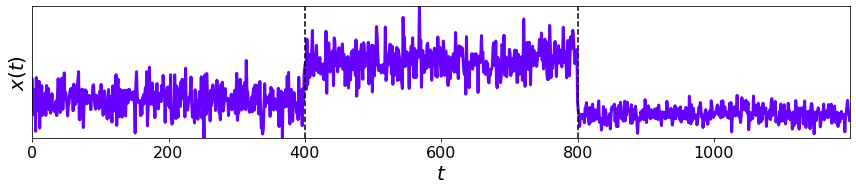

In [3]:
X1 = np.random.RandomState(1).normal(0, 1, size=(400, 1))
X2 = np.random.RandomState(2).normal(3, 1, size=(400, 1))
X3 = np.random.RandomState(3).normal(-1, 0.5, size=(400, 1))
X = np.concatenate((X1, X2, X3), axis=0)
T = np.arange(len(X))
L = np.zeros(len(X))
L[400] = 1
L[800] = 1

make_plots(X, T, L, None, T, s_max=10)
plt.yticks([])
plt.xlabel(r"$t$", size=20)
plt.ylabel(r"$x(t)$", size=20)
plt.tight_layout()
plt.savefig(fname="images/cp_ex.pdf", format="pdf")
plt.savefig(fname="images/cp_ex.png", dpi=300, format="png")

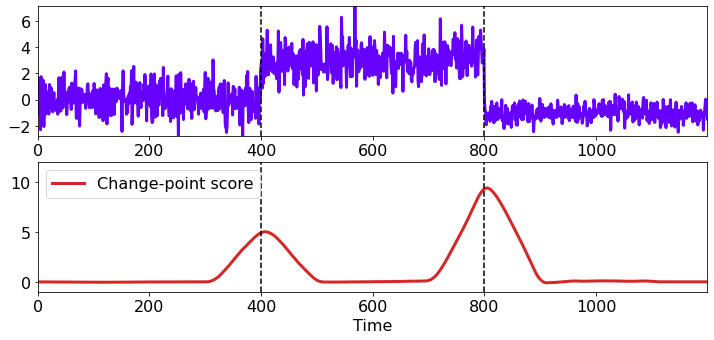

In [4]:
from online_change_clf import ChangePointDetectionOnline, unified_score
from online_change_rulsif import ChangePointDetectionOnline_RuLSIF

# Define a change point detector
clf = ChangePointDetectionOnline(net='auto', scaler='auto', metric="KL_sym", periods=1, batch_size=1, 
                                 lag_size=100, step=1, n_epochs=10, lr=0.01, lam=0.0, optimizer="Adam")

# Detect change points
score_clf, peaks_clf = clf.predict(X, height=1, smooth=True)
shift = clf.lag_size + clf.batch_size
score_clf2 = unified_score(T, T+shift, score_clf)

make_plots(X, T, L, score_clf, T, s_max=12)

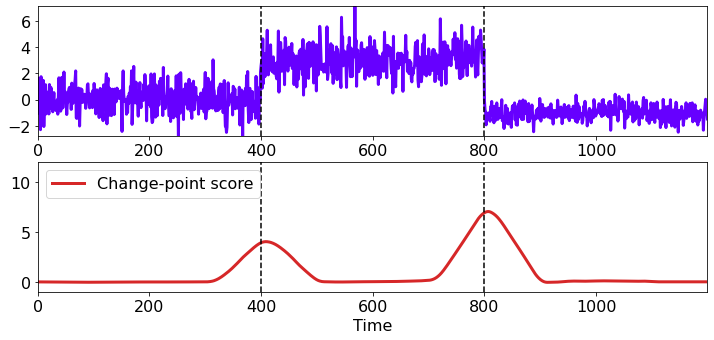

In [5]:
reg = ChangePointDetectionOnline_RuLSIF(net='auto', scaler='auto', metric="None", alpha=0.1, periods=1, batch_size=1, 
                                 lag_size=100, step=1, n_epochs=10, lr=0.01, lam=0.0, optimizer="Adam")

# Detect change points
score_reg, peaks_reg = reg.predict(X, height=1, smooth=True)
shift = reg.lag_size + reg.batch_size
score_reg2 = unified_score(T, T+shift, score_reg)

make_plots(X, T, L, score_reg, T, s_max=12)

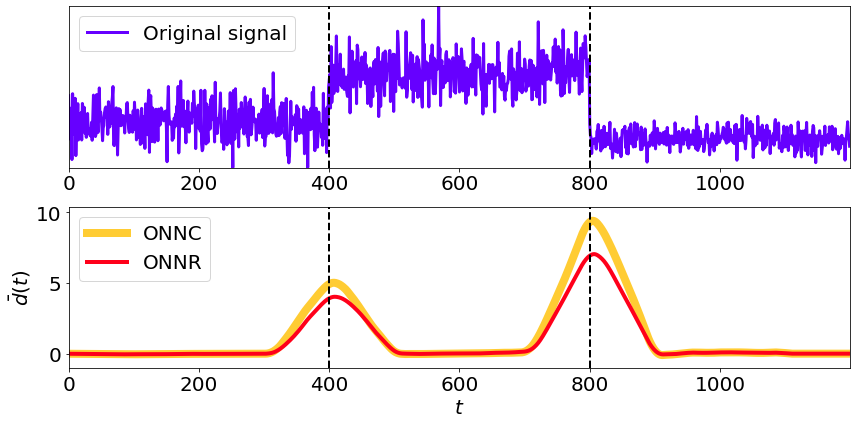

In [6]:
plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(X, linewidth=3, label='Original signal', color='#6600FF')
for t in T[L == 1]:
    plt.plot([t]*2, [X.min(), X.max()], color='0', linestyle='--', linewidth=2)
plt.ylim(X.min(), X.max())
plt.xlim(0, T.max())
plt.xticks(size=20)
plt.yticks([], size=20)
plt.legend(loc='upper left', fontsize=20)

plt.subplot(2, 1, 2)
#plt.plot(score_clf2, linewidth=4, label="ONNC", color='#77B41F')
#plt.plot(score_reg2, linewidth=4, label="ONNR", color='#B41F77', linestyle='--')

plt.plot(score_clf, linewidth=8, label="ONNC", color='#FFCC33')
plt.plot(score_reg, linewidth=4, label="ONNR", color='#FF001A', linestyle='-')

s_max = max(score_reg.max(), score_clf.max())+1
for t in T[L == 1]:
        plt.plot([t]*2, [-1, s_max], color='0', linestyle='--', linewidth=2)
plt.ylim(-1, s_max)
plt.xlim(0, T.max())
plt.xticks(size=20)
plt.yticks(np.arange(0, s_max+1, 5), size=20)
plt.xlabel(r"$t$", size=20)
plt.ylabel(r"$\bar{d}(t)$", size=20)
plt.legend(loc='upper left', fontsize=20)

plt.tight_layout()
plt.savefig(fname="images/cpd_example.pdf", format="pdf")
plt.savefig(fname="images/cpd_example.png", dpi=300, format="png")
plt.show()

In [7]:
plt.figure(figsize=(12, 3.25))

plt.plot(score_clf, linewidth=8, label="ONNC", color='#FFCC33')
plt.plot(score_reg, linewidth=4, label="ONNR", color='#FF001A', linestyle='-')

s_max = max(score_reg.max(), score_clf.max())+1

for t in peaks_clf:
        plt.plot([t]*2, [-1, s_max], color='#FFCC33', linestyle='--', linewidth=8)
for t in peaks_reg:
        plt.plot([t]*2, [-1, s_max], color='#FF001A', linestyle='--', linewidth=4)

for t in T[L == 1]:
        plt.plot([t]*2, [-1, s_max], color='0', linestyle='--', linewidth=2)
plt.ylim(-1, s_max)
plt.xlim(0, T.max())
plt.xticks(size=20)
plt.yticks(np.arange(0, s_max+1, 5), size=20)
plt.xlabel(r"$t$", size=20)
plt.ylabel(r"$\bar{d}'(t)$", size=20)
plt.legend(loc='upper left', fontsize=20)

plt.tight_layout()
plt.savefig(fname="images/cpd_example_shift.pdf", format="pdf")
plt.savefig(fname="images/cpd_example_shift.png", dpi=300, format="png")
plt.show()

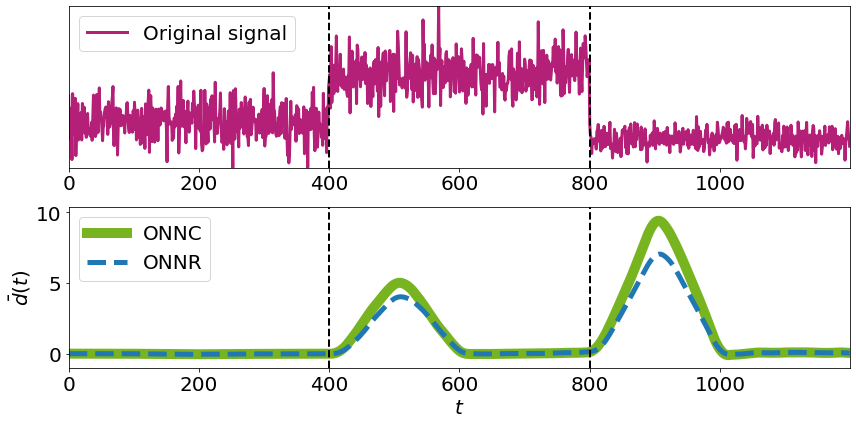

In [8]:
plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(X, linewidth=3, label='Original signal', color='#B41F77')
for t in T[L == 1]:
    plt.plot([t]*2, [X.min(), X.max()], color='0', linestyle='--', linewidth=2)
plt.ylim(X.min(), X.max())
plt.xlim(0, T.max())
plt.xticks(size=20)
plt.yticks([], size=20)
plt.legend(loc='upper left', fontsize=20)

plt.subplot(2, 1, 2)
#plt.plot(score_clf2, linewidth=4, label="ONNC", color='#77B41F')
#plt.plot(score_reg2, linewidth=4, label="ONNR", color='#B41F77', linestyle='--')

plt.plot(score_clf2, linewidth=10, label="ONNC", color='#77B41F')
plt.plot(score_reg2, linewidth=5, label="ONNR", color='#1F77B4', linestyle='--')

s_max = max(score_reg.max(), score_clf.max())+1
for t in T[L == 1]:
        plt.plot([t]*2, [-1, s_max], color='0', linestyle='--', linewidth=2)
plt.ylim(-1, s_max)
plt.xlim(0, T.max())
plt.xticks(size=20)
plt.yticks(np.arange(0, s_max+1, 5), size=20)
plt.xlabel(r"$t$", size=20)
plt.ylabel(r"$\bar{d}(t)$", size=20)
plt.legend(loc='upper left', fontsize=20)

plt.tight_layout()
#plt.savefig(fname="images/cpd_example.pdf", format="pdf")
#plt.savefig(fname="images/cpd_example.png", dpi=300, format="png")
plt.show()